##한다연##

#제출자료(내일까지)
#제출코드작업의 목적을 명확하게 기술하세요
-데이터분석의 EDA와 p-value, kmean 의 사용법
-함수 및 클래스 코드에 집중
-판다스 EDA 및 seaborn 차트

==> 주석 또는 별도의 설명서 캡쳐해서 마크다운에 넣고 git에 올리기
==> 보고 있는 자료로 해도 되고 다른 자료로 해도됨.

1. 데이터 획득 및 정제

In [100]:
%matplotlib inline
#%matplotlib inline은 그래프를 인라인으로 표시하도록 설정하고, 이어지는 Matplotlib 코드는 해당 그래프를 생성하고 출력

In [101]:
# 데이터 조작 및 시각 표현을 위한 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

# 입력 데이터 파일은 읽기 전용 "../input/" 디렉토리에 있습니다
# 예를 들어, 이 코드를 실행하면 (실행 버튼 클릭 또는 Shift+Enter 누름) 입력 디렉토리에 있는 모든 파일이 나열됩니다
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# "Save & Run All"을 사용하여 생성한 현재 디렉토리(/kaggle/working/)에 최대 20GB까지 쓸 수 있습니다.
# 또한 /kaggle/temp/에 임시 파일을 작성할 수 있지만, 현재 세션 외부에 저장되지 않습니다.
df = pd.read_csv("C:/Users/bluecom002/Desktop/Python 4/job/HR_comma_sep.csv")



In [102]:
df.isnull().any() #DataFrame인 df에서 각 열(column)에 대해 결측값(누락된 값)이 있는지 여부를 나타내는 불리언(Boolean) 시리즈를 반환

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [103]:
df.head() #DataFrame인 df의 처음 5개 행을 반환

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [104]:
# 가독성을 높이기 위해 특정 열의 이름 바꾸기
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [105]:
# 응답 변수 "turnover"를 테이블의 맨 앞으로 이동
#데이터프레임(df)에서 'turnover' 열을 추출하여 (front 변수에 저장하고), 원래 데이터프레임에서 'turnover' 열을 삭제한 후, 
#해당 열을 데이터프레임의 맨 앞에 삽입하는 작업을 수행합니다. 이는 'turnover' 열을 데이터프레임의 첫 번째 열로 이동시키는 것과 같다.
#'turnover' 열이 데이터프레임의 맨 앞에 위치하게 되어 가독성을 높이고, 분석이나 시각화 작업에서 편리하게 사용
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


2. 데이터를 탐색하는 과정(데이터에 대한 통계적인 개요)

In [106]:
df.shape #데이터프레임 df의 행과 열의 개수를 튜플 형태로 반환

(14999, 10)

In [107]:
df.dtypes #데이터프레임 df의 각 열의 데이터 타입

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department              object
salary                  object
dtype: object

In [108]:
#df.turnover.value_counts(): 'turnover' 열의 각 값(클래스)이 나타난 횟수를 계산. 
#이는 해당 열의 고용 이탈 여부에 대한 빈도를 나타냄.
# / 14999: 전체 데이터셋의 행 수(고용주 1인당 한 행)로 나눠서 각 클래스의 비율을 계산. 이 경우 14999는 데이터셋의 전체 행 수
# 계산된 비율을 turnover_rate 변수에 저장
turnover_rate = df.turnover.value_counts() / 14999  
turnover_rate

##결과##
#클래스 0 (이탈하지 않음): 76.19%
#클래스 1 (이탈함): 23.81%

turnover
0    0.761917
1    0.238083
Name: count, dtype: float64

In [109]:
# 데이터프레임의 수치형 열에 대한 기초 통계량
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


## 결과
데이터셋에는 약 15,000개의 직원 관측치가 있으며, 열의 수는 총 10개
회사의 이탈률은 약 24%로 나타난다. 이는 전체 직원 중 24%가 퇴사했음을 의미.
직원들의 평균 만족도는 0.61 => 이는 0에서 1까지의 범위에서 측정된 만족도 점수로, 높을수록 높은 만족도를 나타냄.

In [110]:
###'turnover' 열에 따라 데이터를 그룹화하고, 이에 대한 평균값을 계산하여 제공. 즉, 이탈 여부에 따라서 데이터를 나누어 평균을 산출###


turnover_Summary = df.groupby('turnover')  #turnover' 열의 값에 따라 데이터를 그룹화
turnover_Summary.mean(numeric_only=True) # numeric_only=True 파라미터는 수치형 열에 대해서만 계산하도록 지정, 각 그룹에 대해 평균값을 계산

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


3. 상관 행렬(Correlation Matrix) && 히트맵(Heatmap)

-상관 행렬 : 데이터의 각 변수 간 상관 관계를 나타내는 행렬입니다. 
각 변수 간의 상관 관계를 계산하여 행렬 형태로 나타냅니다. 
상관 관계는 두 변수 간의 선형적인 관련성을 나타내며, -1에서 1까지의 값을 가집니다.

-히트맵 : 히트맵(Heatmap)은 이 상관 행렬을 시각적으로 표현한 것입니다. 
색상을 사용하여 각 상관 계수의 크기와 부호를 나타냅니다. 
일반적으로 밝은 색(예: 노란색)은 강한 양의 상관 관계를, 어두운 색(예: 파란색)은 강한 음의 상관 관계를 나타냅니다.

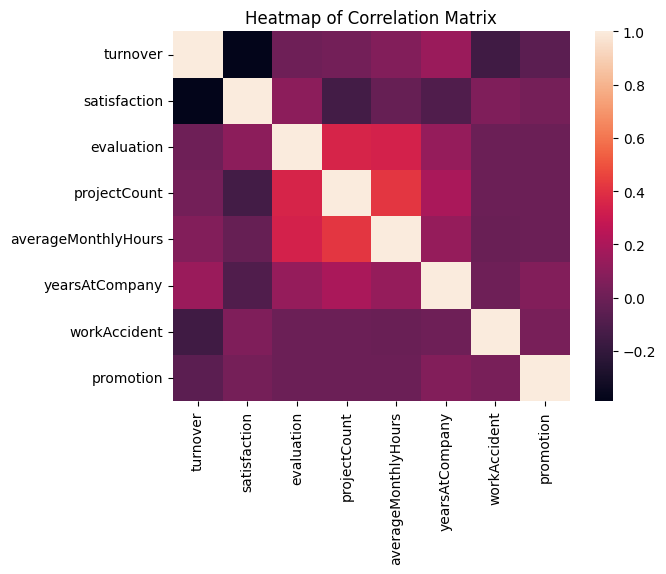

In [111]:
# 수치형 열만 선택
numeric_columns = df.select_dtypes(include=[np.number]).columns

# 수치형 열에 대한 상관 행렬 계산
corr = df[numeric_columns].corr()

# 상관 행렬을 히트맵으로 시각화
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 히트맵에 제목 추가
plt.title('Heatmap of Correlation Matrix')

# 히트맵 표시
plt.show()


3. 통계적 상관성 검정(Statistical Test for Correlation)

In [112]:
# 직원 이탈 여부에 따른 만족도 평균 비교

# 전체 직원의 만족도 평균 계산
emp_population_satisfaction = df['satisfaction'].mean()

# 이탈한 직원들의 만족도 평균 계산
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

# 결과 출력
print('직원 전체의 만족도 평균: ' + str(emp_population_satisfaction))
print('이탈한 직원들의 만족도 평균: ' + str(emp_turnover_satisfaction))


직원 전체의 만족도 평균: 0.6128335222348156
이탈한 직원들의 만족도 평균: 0.4400980117614114


4. T-검정(T-Test)
-두 집단 간의 평균 차이가 통계적으로 유의미한지를 검정하는 통계적 방법 중 하나입니다. 


In [113]:
import scipy.stats as stats
import pandas as pd  # Assuming 'df' is a pandas DataFrame

# 이탈한 직원들의 만족도 샘플
satisfaction_turnover = df[df['turnover'] == 1]['satisfaction']

# 전체 직원의 만족도 평균
population_satisfaction_mean = emp_population_satisfaction

# 1표본 T-검정 수행
t_statistic, p_value = stats.ttest_1samp(a=satisfaction_turnover, popmean=population_satisfaction_mean)

# 결과 출력
print('1표본 T-검정 통계량 (t-statistic):', t_statistic)
print('P-값 (p-value):', p_value)


1표본 T-검정 통계량 (t-statistic): -39.10948894348423
P-값 (p-value): 9.0127811954355e-279


## 결과
P-값이 매우 작기 때문에, 귀무 가설을 기각할 수 있습니다.
따라서, '이탈한 직원들의 만족도 평균'과 '전체 직원의 만족도 평균' 간의 차이는 통계적으로 유의미합니다.
또한, T-통계량이 음수이므로, 이탈한 직원들의 만족도 평균이 전체 직원의 만족도 평균보다 작다는 결과를 얻을 수 있습니다.

In [114]:
# 테스트의 자유도 계산
degree_freedom = len(df[df['turnover']==1])

# t-분포에서의 왼쪽 및 오른쪽 사분위수 계산/ 이 값은 신뢰 수준이 95%일 때의 t-분포에서 양측으로 꼬리 부분의 임계치
LQ = stats.t.ppf(0.025, degree_freedom)  # degree_freedom: 이탈한 직원들의 표본에 대한 자유도/ LQ: t-분포에서의 0.025 (2.5%) 백분위수로, 좌측 사분위수
RQ = stats.t.ppf(0.975, degree_freedom)  # RQ: t-분포에서의 0.975 (97.5%) 백분위수로, 우측 사분위수

# 결과 출력
print('t-분포의 좌측 사분위수 범위: ' + str(LQ))
print('t-분포의 우측 사분위수 범위: ' + str(RQ))


t-분포의 좌측 사분위수 범위: -1.9606285215955626
t-분포의 우측 사분위수 범위: 1.9606285215955621


5. 만족도(Satisfaction), 평가(Evaluation), 평균 월간 근무시간(AverageMonthlyHours) 변수의 분포를 시각화

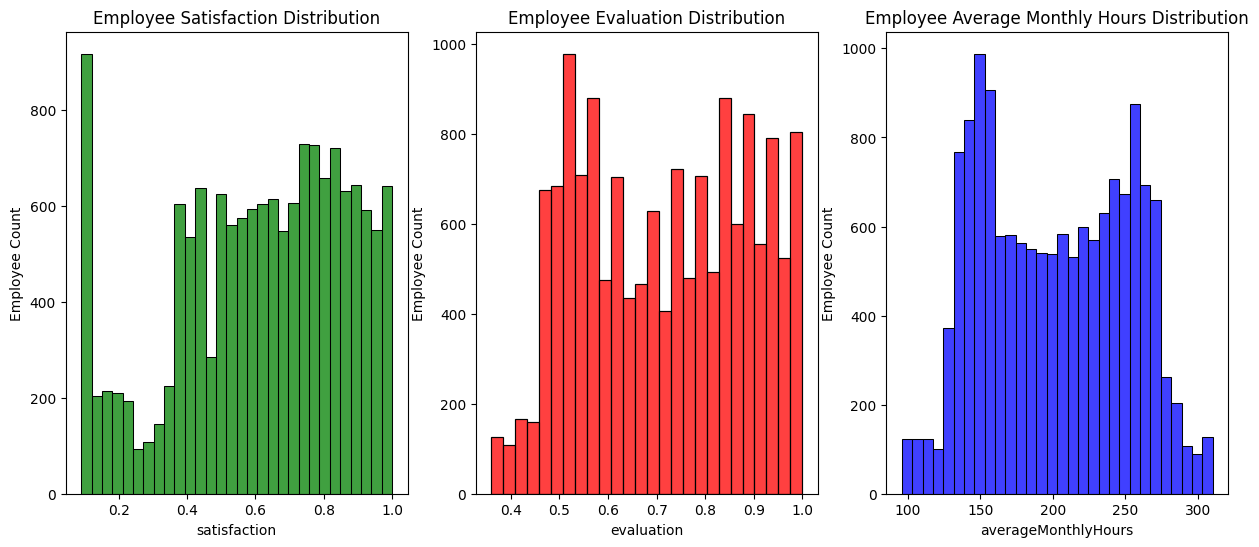

In [115]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# # 직원 만족도 그래프
sns.histplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# # 직원 평가 그래프
sns.histplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

## 직원 월간 평균 근무시간 그래프
sns.histplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

plt.show()


6. Salary V.S. Turnover

## 결론
대다수 이탈한 직원들은 낮거나 중간 수준의 월급을 받았습니다. 높은 월급을 받은 직원들은 거의 이탈하지 않았습니다. 
낮은 월급에서 평균 월급 수준까지의 직원들이 회사를 떠나는 경향이 있습니다.

Text(0.5, 1.0, 'Employee Salary Turnover Distribution')

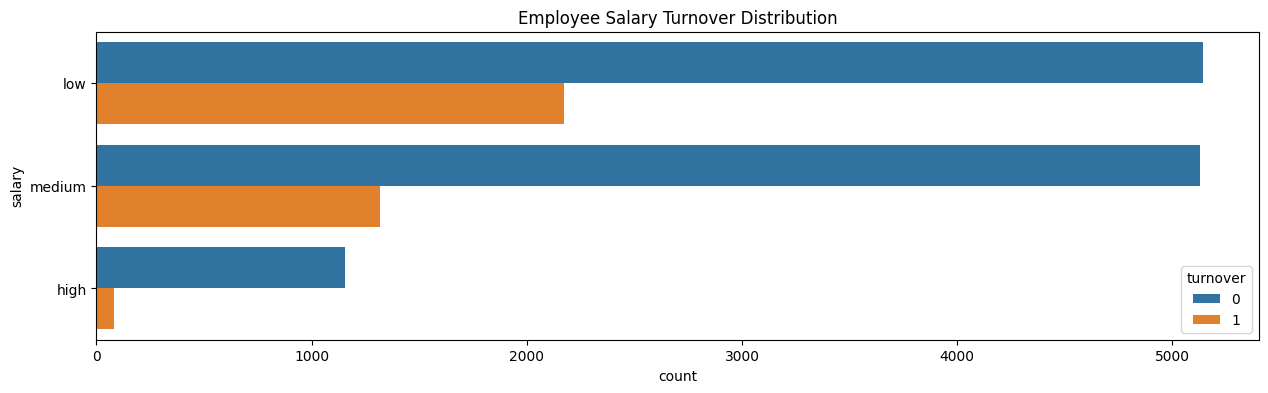

In [116]:
# Matplotlib figure 설정
f, ax = plt.subplots(figsize=(15, 4))
# 직원 월급과 이탈 여부에 따른 Countplot / Countplot은 각 범주형 변수 값에 대한 빈도수를 막대 그래프로 표현
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution')

7. Department V.S. Turnover

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

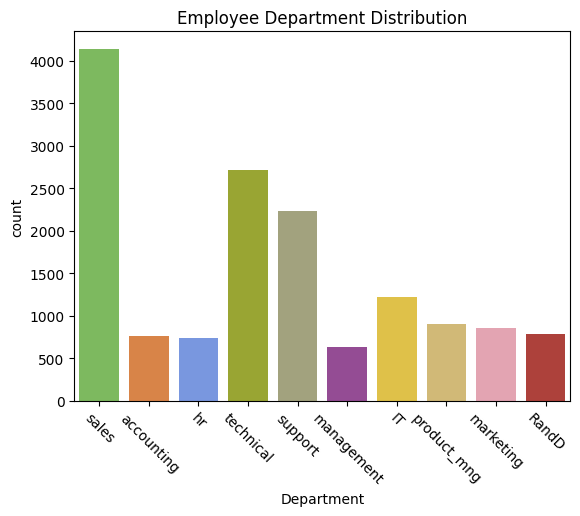

In [117]:
# 색상 유형 지정
color_types = ['#78C850', '#F08030', '#6890F0', '#A8B820', '#A8A878', '#A040A0', '#F8D030', '#E0C068', '#EE99AC', '#C03028']
# 카운트 플롯 (막대 그래프)
sns.countplot(x='Department', data=df, hue='Department', palette=color_types, legend=False).set_title('Employee Department Distribution')

# x 라벨 회전
plt.xticks(rotation=-45)

## 결과
영업, 기술 및 지원 부서는 직원 이직이 가장 높은 세 부서이었습니다. 반면에 경영 부서는 이직이 가장 적었습니다.

Text(0.5, 1.0, 'Employee Department Turnover Distribution')

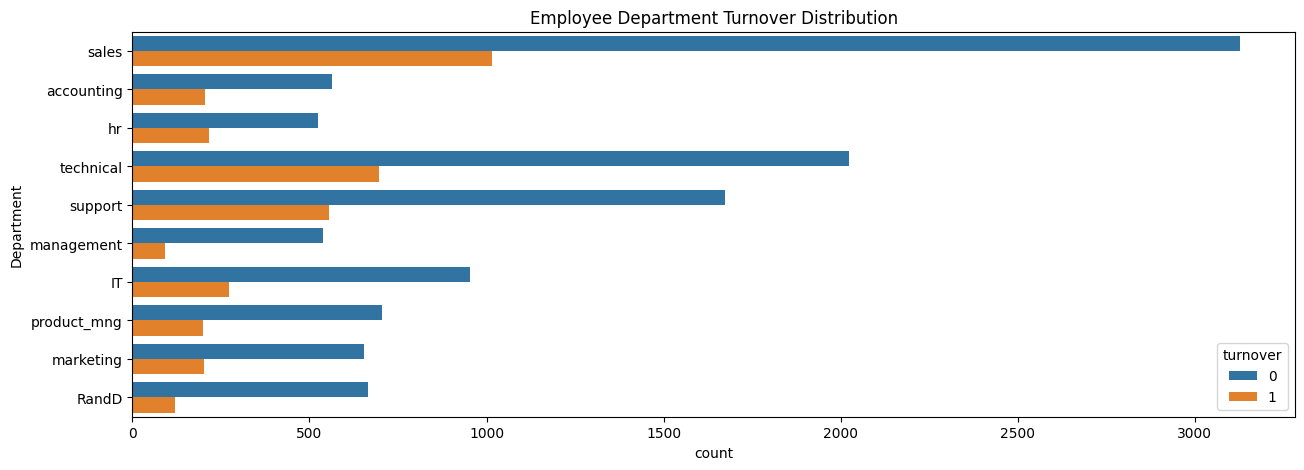

In [118]:
# 그래픽의 크기를 설정하여 서브플롯 생성
f, ax = plt.subplots(figsize=(15, 5))
# Seaborn의 countplot을 사용하여 부서별 직원 이직 분포 시각화
sns.countplot(y="Department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution')



# 주석: 그래픽 크기 및 countplot 설명
# f, ax = plt.subplots(figsize=(15, 5)): 그래픽 크기를 조절하여 새로운 서브플롯을 생성합니다.
# sns.countplot(y="Department", hue='turnover', data=df): Seaborn의 countplot을 사용하여 부서별 직원 이직 분포를 그립니다.
# y="Department": y축에 부서 정보를 표시합니다.
# hue='turnover': turnover에 따라 다른 색상으로 표시하여 직원 이직 여부를 구분합니다.
# data=df: 사용할 데이터프레임을 지정합니다.
# .set_title('직원 부서 이직 분포'): 그래픽의 제목을 설정합니다.
# 이 코드는 부서별 직원 이직을 시각적으로 파악할 수 있는 효과적인 그래픽을 생성합니다.


8. Turnover V.S. ProjectCount(Seaborn의 barplot을 사용하여 프로젝트 수와 이직 여부 간의 관계 시각화)

[Text(0, 0.5, 'Percent')]

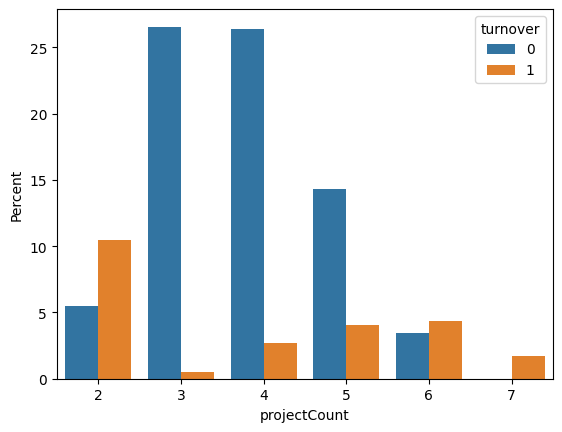

In [119]:
# Seaborn의 barplot을 사용하여 프로젝트 수와 이직 여부 간의 관계 시각화/ x="projectCount": x축에 프로젝트 수 정보를 표시/y="projectCount": y축에도 프로젝트 수 정보를 표시
#hue="turnover": turnover에 따라 다른 색상으로 표시하여 이직 여부를 구분/data=df: 사용할 데이터프레임을 지정/estimator=lambda x: len(x) / len(df) * 100: 각 막대의 높이를 백분율로 나타내기 위한 추정함수를 사용
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
# y축 레이블 설정
ax.set(ylabel="Percent")



9. Turnover V.S. Evaluation(이직 여부에 따른 직원 평가의 분포를 시각화하여, 두 그룹 간의 차이를 비교)

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

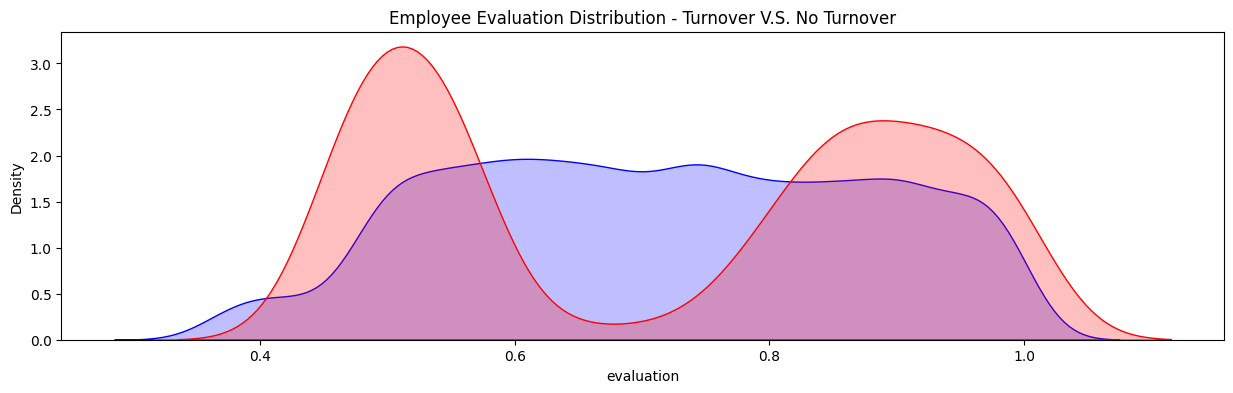

In [120]:
# Kernel Density Plot을 생성하여 직원 평가의 분포를 시각화
fig = plt.figure(figsize=(15, 4))
#이직이 없는 경우의 평가에 대한 커널 밀도 플롯을 그립니다. (파란색)
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'evaluation'], color='b', fill=True, label='no turnover') 
#이직이 발생한 경우의 평가에 대한 커널 밀도 플롯을 그립니다. (빨간색)
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'evaluation'], color='r', fill=True, label='turnove')
#직원 평가 분포 - 이직 대비 이직 없음
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')



## 결과

회사를 떠난 직원들 중에는 이중모드(bimodal) 분포가 나타나고 있습니다. 
낮은 성과를 보인 직원들은 더 많이 퇴사하는 경향이 있습니다. 반면에 높은 성과를 보인 직원들 또한 더 많이 퇴사하는 경향이 있습니다. 
회사에 남아 있는 직원들의 경우, 평가(Evaluation)가 0.6에서 0.8 사이에 있는 것이 적절한 수준으로 나타납니다.

10. Turnover V.S. AverageMonthlyHours( 이직 여부에 따른 직원의 월 평균 근무 시간 분포를 시각화하여, 두 그룹 간의 차이를 비교)

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

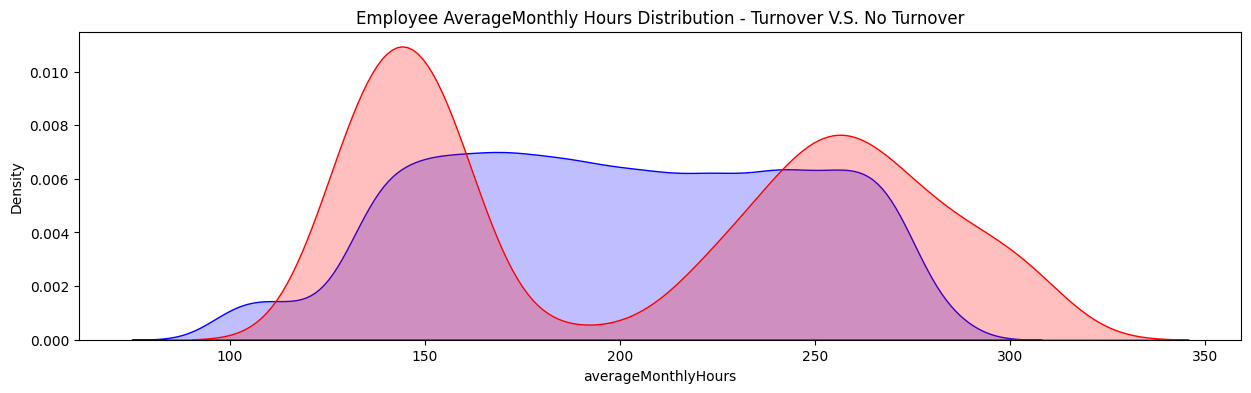

In [121]:
# KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15, 4))

# 이직이 없는 경우의 월 평균 근무 시간에 대한 커널 밀도 플롯
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'averageMonthlyHours'], color='b', fill=True, label='no turnover')

# 이직이 발생한 경우의 월 평균 근무 시간에 대한 커널 밀도 플롯
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'averageMonthlyHours'], color='r', fill=True, label='turnover')

# 그래프 제목 설정
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')




## 결과

회사를 떠난 직원들 중에는 또 다른 이중모드(bimodal) 분포가 나타나고 있습니다. 
근무 시간이 적은 직원들(약 150시간 이하)은 더 많이 퇴사하는 경향이 있습니다. 
반면에 근무 시간이 많은 직원들(약 250시간 이상) 또한 더 많이 퇴사하는 경향이 있습니다. 
즉, 퇴사한 직원들 중에서는 일부는 근무 시간이 부족한 경우이고 일부는 근무 시간이 과다한 경우가 나타나고 있습니다. 
종합하면 퇴사한 직원들은 일반적으로 근무 시간이 부족하거나 과다한 경우가 많습니다.

11. Turnover V.S. Satisfaction (이직 여부에 따른 직원의 만족도 분포를 시각화하여, 두 그룹 간의 차이를 비교)

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

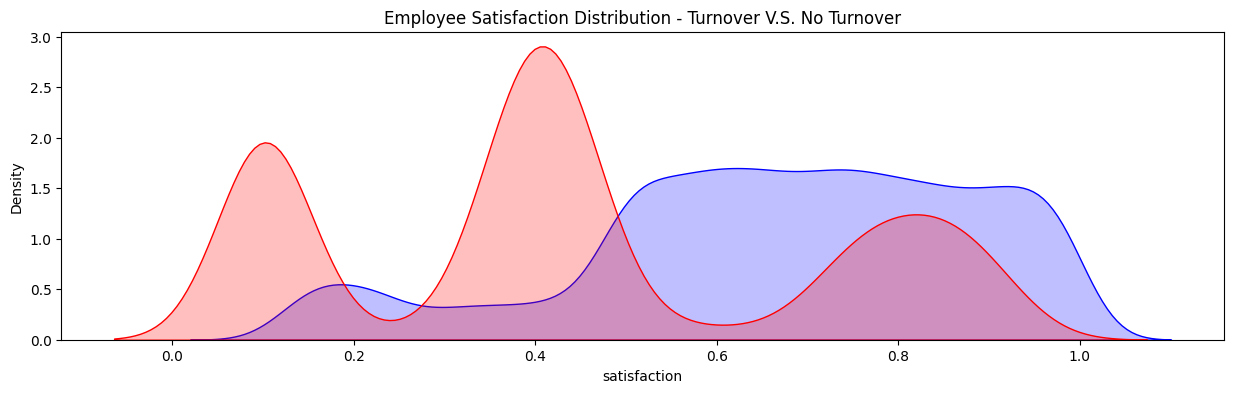

In [122]:
# KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15, 4))

# 이직이 없는 경우의 만족도에 대한 커널 밀도 플롯
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'satisfaction'], color='b', fill=True, label='no turnover')

# 이직이 발생한 경우의 만족도에 대한 커널 밀도 플롯
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'satisfaction'], color='r', fill=True, label='turnover')

# 그래프 제목 설정
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')




## 결과
회사를 떠난 직원들 중에는 삼중 모달(tri-modal) 분포가 나타나고 있습니다. 
매우 낮은 만족도 수준(0.2 이하)을 갖는 직원들은 더 많이 퇴사하는 경향이 있습니다. 
만족도 수준이 낮은 직원들(0.3~0.5) 역시 더 많이 퇴사하는 경향이 있습니다. 
반면에 매우 높은 만족도 수준(0.7 이상)을 갖는 직원들도 더 많이 퇴사하는 경향이 있습니다. 
종합하면 만족도 수준이 매우 낮거나 낮은 경우, 그리고 매우 높은 경우에 퇴사하는 직원들이 각각 나타나고 있습니다.

12. ProjectCount VS AverageMonthlyHours(프로젝트 수와 월 평균 근무 시간 간의 관계를 이직 여부에 따라 시각화한 상자그림을 생성)
중앙값, 사분위수, 이상치 등을 파악

<Axes: xlabel='projectCount', ylabel='averageMonthlyHours'>

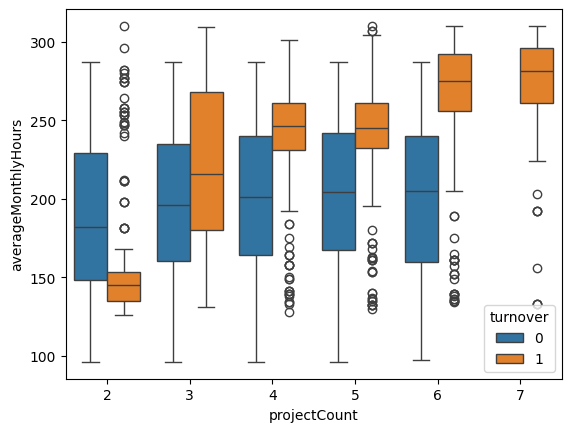

In [123]:
# ProjectCount VS AverageMonthlyHours [BOXPLOT]
# 프로젝트 수와 월 평균 근무 시간 간의 관계를 상자그림으로 시각화

import seaborn as sns

# Seaborn의 boxplot을 사용하여 프로젝트 수와 월 평균 근무 시간 간의 관계를 시각화
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)



## 결과

프로젝트 수가 증가함에 따라 월 평균 근무 시간도 증가했습니다. 
상자그림에서 이상한 점은 이직이 발생한 경우와 발생하지 않은 경우의 월 평균 근무 시간 차이입니다. 
이직이 없는 직원들은 프로젝트 수가 증가하더라도 꾸준한 월 평균 근무 시간을 유지했습니다. 
반면에 이직이 발생한 직원들은 프로젝트 수가 증가함에 따라 월 평균 근무 시간이 증가한 것으로 나타났습니다.

13. ProjectCount VS Evaluation(프로젝트 수(projectCount)와 직원 평가(evaluation) 간의 관계를 이직 여부(turnover)에 따라 상자그림(boxplot)으로 시각화)

<Axes: xlabel='projectCount', ylabel='evaluation'>

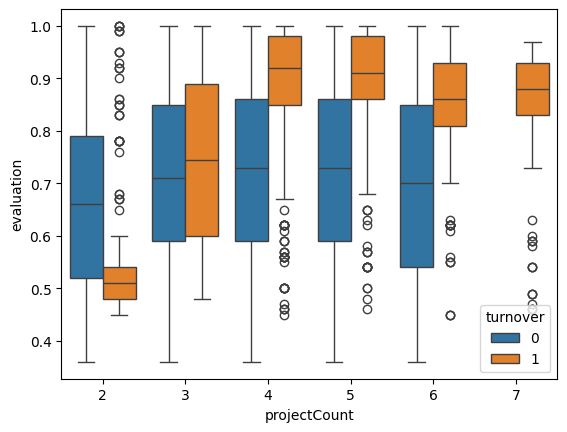

In [124]:
# ProjectCount VS Evaluation [BOXPLOT]
# 프로젝트 수와 직원 평가 간의 관계를 이직 여부에 따라 상자그림으로 시각화

import seaborn as sns

# Seaborn의 boxplot을 사용하여 프로젝트 수와 직원 평가 간의 관계를 이직 여부에 따라 시각화
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)



## 결과
 이 그래프에서 이직 그룹에서 프로젝트 수가 증가함에 따라 평가(Evaluation)가 상승하는 것이 관찰됩니다. 
 그러나 이직하지 않은 그룹에서는 프로젝트 수가 증가하더라도 직원들은 일정한 평가 점수를 유지합니다.

14. Satisfaction VS Evaluation(만족도와 평가 간의 관계를 산점도로 시각화하고, 이직한 그룹과 이직하지 않은 그룹을 색상으로 구분하여 보여줍니다.)

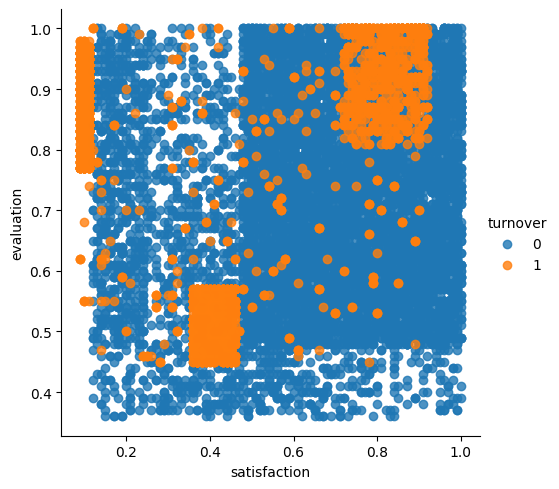

In [125]:
# Satisfaction VS Evaluation [Scatter Plot]
# 만족도와 평가 간의 관계를 산점도로 시각화하고, 이직 여부에 따라 색상으로 구분

import seaborn as sns

# Seaborn의 lmplot을 사용하여 만족도와 평가 간의 관계를 산점도로 시각화
# - fit_reg=False: 회귀선을 그리지 않습니다.
# - hue='turnover': turnover에 따라 다른 색상으로 표시하여 이직 여부를 구분합니다.
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover')




## 결과
클러스터 1 (열심히 일하고 우울한 직원): 만족도가 0.2 미만이고 평가가 0.75 이상이었습니다. 이는 회사를 떠난 직원들이 뛰어난 직원이었지만 업무에 대해 매우 나쁜 감정을 가졌을 수 있다는 좋은 징조일 수 있습니다.

클러스터 2 (나쁘고 우울한 직원): 만족도가 약 0.35 ~ 0.45이고 평가가 약 0.58 미만이었습니다. 이는 직원들이 부정적으로 평가되었으며 업무에 대해 나쁜 감정을 가졌을 수 있다는 것을 나타낼 수 있습니다.

클러스터 3 (열심히 일하고 행복한 직원): 만족도가 0.7 ~ 1.0 사이이고 평가가 0.8 이상이었습니다. 이는 이 클러스터의 직원들이 "이상적"이었을 수 있습니다. 그들은 자신의 일을 사랑하고 뛰어난 성과로 높게 평가받았을 것으로 생각됩니다.

15. Turnover V.S. YearsAtCompany(근속 기간에 따른 이직 여부의 비율을 나타내는 막대 그래프를 생성)

[Text(0, 0.5, 'Percent')]

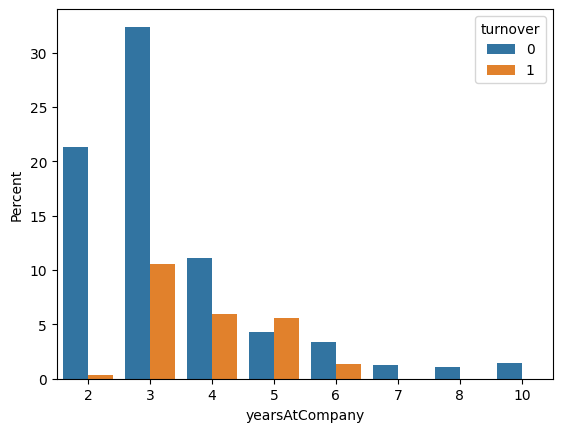

In [126]:
# Bar Plot of Turnover by Years at Company
# 회사에서의 근속 기간에 따른 이직 여부의 비율을 막대 그래프로 시각화

import seaborn as sns

# Seaborn의 barplot을 사용하여 근속 기간에 따른 이직 여부의 비율을 막대 그래프로 시각화
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)

# y축 레이블 설정
ax.set(ylabel="Percent")


# - x="yearsAtCompany": x축에 근속 기간 정보를 표시합니다.
# - y="yearsAtCompany": y축에 근속 기간 정보를 표시하지만, 실제로는 비율을 나타냅니다.
# - hue="turnover": turnover에 따라 다른 색상으로 표시하여 이직 여부를 구분합니다.
# - estimator=lambda x: len(x) / len(df) * 100: 각 근속 기간에 대한 이직 여부의 비율을 계산합니다.
# - ax.set(ylabel="Percent"): y축에 레이블 "Percent"를 설정합니다.



## 결과
4년과 5년 근속한 직원 중 절반 이상이 회사를 떠났습니다. 특히 5년 근속한 직원들에 대해 주목할 필요가 있습니다.

16. 최종
K-Means Clustering of Employee Turnover

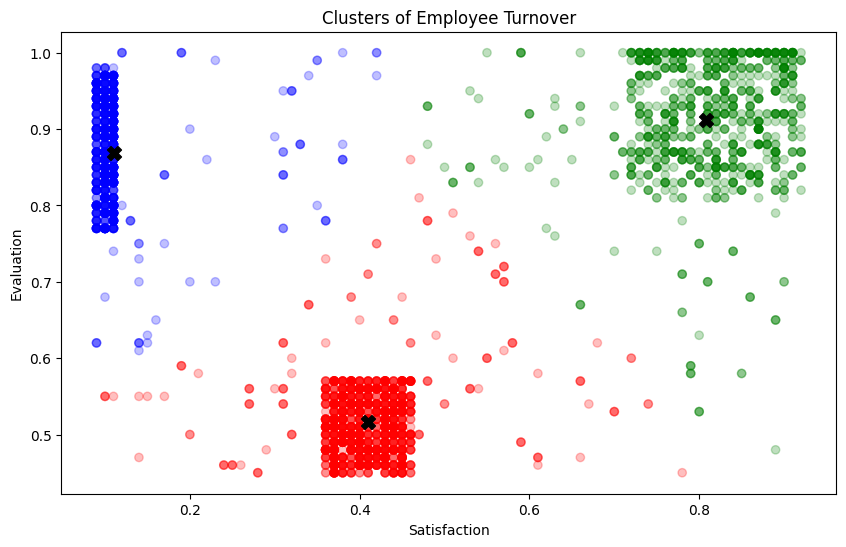

In [127]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
# KMeans 모델을 불러오고, 직원 이직 데이터를 사용하여 3개의 클러스터를 생성합니다.
kmeans = KMeans(n_clusters=3, random_state=2, n_init=10)  # n_init를 명시적으로 설정
kmeans.fit(df[df.turnover == 1][["satisfaction", "evaluation"]])

# 각 클러스터에 대한 색상을 설정합니다.
kmeans_colors = ['red' if c == 0 else 'blue' if c == 2 else 'green' for c in kmeans.labels_]

# 시각화를 위한 그림 크기 설정
fig = plt.figure(figsize=(10, 6))

# 직원 이직 데이터를 산점도로 나타내고, 각 클러스터에 다른 색상을 적용합니다.
plt.scatter(x="satisfaction", y="evaluation", data=df[df.turnover == 1],
            alpha=0.25, color=kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")

# 클러스터의 중심점을 검은색 X로 표시합니다.
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color="black", marker="X", s=100)

# 그래프 제목 설정
plt.title("Clusters of Employee Turnover")

# 그래프를 출력합니다.
plt.show()


# KMeans 모델을 불러와서 3개의 클러스터를 생성합니다.
# 직원 이직 데이터에서 "만족도"와 "평가"를 기반으로 클러스터링을 수행합니다.
# 각 클러스터에 대한 레이블을 설정하고, 클러스터에 따라 다른 색상을 적용합니다.
# 산점도를 그려서 직원 이직 데이터를 시각화합니다.
# 클러스터의 중심점을 검은색 X로 표시하여 각 클러스터의 중심을 나타냅니다.


## 최종
Cluster 1 (Blue): 열심히 일하고 우울한 직원
-만족도가 낮고 평가가 높은 직원들로 구성.
-뛰어난 업무 능력을 가졌지만 업무에 대한 부정적인 감정을 가진 직원들

Cluster 2 (Red): 나쁘고 우울한 직원
-만족도와 평가가 모두 낮은 직원들로 구성.
-업무 성과가 낮고 업무에 대한 부정적인 감정을 가진 직원들.

Cluster 3 (Green): 열심히 일하고 행복한 직원
-만족도와 평가가 모두 높은 직원들로 구성.
-뛰어난 업무 능력을 가지고 있으며 업무에 대한 긍정적인 감정을 가진 직원들.


이러한 클러스터링 결과를 토대로 회사는 각 그룹에 맞는 조치를 취할 수 있습니다. 
예를 들어, 열심히 일하고 우울한 직원들에게는 업무에 대한 피드백이나 향상된 업무 환경을 제공하여 만족도를 높이고, 
나쁘고 우울한 직원들에게는 업무 성과를 개선하고 긍정적인 환경을 조성하는 등의 조치가 가능합니다. 
종합적으로, 클러스터링은 직원 이직에 대한 개별적인 전략 수립과 조직의 전반적인 웰빙 향상에 도움을 줄 수 있습니다.